# Diabetes Project

# Load Data

In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/cashbooda/ML/refs/heads/main/resampled_diabetes_data.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,84,0,0,0,0.000000,0.304000,21,0
1,9,112,82,24,0,28.200000,1.282000,50,1
2,1,139,46,19,83,28.700000,0.654000,22,0
3,0,161,50,0,0,21.900000,0.254000,65,0
4,6,134,80,37,370,46.200000,0.238000,46,1
...,...,...,...,...,...,...,...,...,...
797,7,113,66,0,0,32.790691,0.258326,42,1
798,9,148,82,45,231,38.583317,0.911017,48,1
799,8,126,68,26,115,29.775283,0.208946,37,1
800,0,141,0,0,0,42.612697,0.255220,29,1


# Data Preperation

## Data Seperation as X and Y

In [6]:
y = df['Outcome']


In [7]:
X = df.drop('Outcome', axis=1)


## Data Spliting

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [9]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
233,3,150,76,0,0,21.000000,0.207000,37
54,7,187,68,39,304,37.700000,0.254000,41
396,1,136,74,50,204,37.400000,0.399000,24
566,9,170,74,31,0,44.000000,0.403000,43
81,1,103,30,38,83,43.300000,0.183000,33
...,...,...,...,...,...,...,...,...
53,0,123,88,37,0,35.200000,0.197000,29
350,3,173,82,48,465,38.400000,2.137000,25
79,0,135,68,42,250,42.300000,0.365000,24
792,2,141,0,0,0,29.763893,0.711795,27


In [10]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
125,0,134,58,20,291,26.400000,0.352000,21
630,5,138,74,28,199,37.138295,0.534108,31
543,2,95,54,14,88,26.100000,0.748000,22
248,1,90,62,12,43,27.200000,0.580000,24
413,2,106,56,27,165,29.000000,0.426000,22
...,...,...,...,...,...,...,...,...
558,8,126,88,36,108,38.500000,0.349000,49
432,3,176,86,27,156,33.300000,1.154000,52
511,5,166,76,0,0,45.700000,0.340000,27
453,7,133,88,15,155,32.400000,0.262000,37


# **Model Building**

## Linear Regression

### **Training the Model**

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### **Applying model to make prediction**

In [12]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [13]:
y_lr_train_pred

array([ 4.18614358e-01,  1.01296243e+00,  5.08021390e-01,  1.10484650e+00,
        5.71938737e-01,  3.92983439e-01,  4.38340747e-01,  7.39504969e-01,
        4.46960518e-01,  2.96060659e-01,  9.12075257e-02,  1.90559155e-01,
        5.92771985e-01,  6.29246010e-01,  1.32028969e-01,  3.82319930e-02,
        1.44925922e-01,  7.35352077e-01,  5.71306653e-01,  5.45018112e-01,
        3.07100817e-02,  3.83830040e-01,  3.84137634e-01,  2.93762805e-01,
        7.67599854e-01,  9.02078540e-01,  2.00813850e-01,  5.53189524e-01,
        5.78804683e-01,  8.37549640e-01,  1.38650963e-01,  2.80545696e-01,
        2.45403019e-01,  5.78565389e-01, -3.63984263e-01,  1.96735699e-01,
        5.11717140e-01,  8.44862744e-01,  1.88957659e-01,  1.01217457e+00,
        2.26078916e-01,  6.47419783e-01,  1.14543036e+00, -5.13878372e-02,
        7.24816021e-01,  1.16419086e-01,  2.84321016e-01,  7.59608577e-01,
        9.23414083e-01,  3.88575774e-01,  4.84572499e-01,  4.01552074e-01,
        8.83860373e-01,  

### **Evaluate Model Performance**

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [16]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [17]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.165003,0.339627,0.172964,0.302086


## **Random Forest**

### **Training the model**

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make prediction**

In [20]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### **Evaluate Model Performance**

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [26]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,0.157958,0.367823,0.161221,0.349471


## Comparing Models

In [28]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.165003,0.339627,0.172964,0.302086
0,Random Forest,0.157958,0.367823,0.161221,0.349471


# Data Visualization

Text(0, 0.5, 'Predicted')

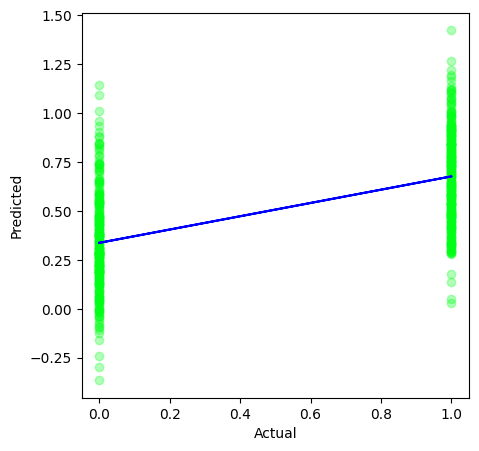

In [44]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#00ff17", alpha=0.3)

z=np.polyfit(y_train, y_lr_train_pred, 1)
p=np.poly1d(z)

plt.plot(y_train, p(y_train), '#0000ff')
plt.ylabel('Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')